# Etapa 1: Proyecto de Aprendizaje Supervisado
Daniel Eduardo Arana Bodart, A01741202

Jose Manuel Guerrero Arellano, A01747623

Valeria García Hernández, A01742811

## Limpieza

#### Importar librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Crear dataset

In [3]:
df = pd.read_csv("dataset_PCOS.csv")
display(df.shape)
df

(999, 45)

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
0,1.0,1.0,0.0,28.0,44.6,152.0,19.300000,15.0,78.0,22.0,...,1.0,0.0,110.0,80.0,3.0,3.0,18.0,18.0,8.5,NaN
1,2.0,2.0,0.0,36.0,65.0,161.5,24.921163,15.0,74.0,20.0,...,0.0,0.0,120.0,70.0,3.0,5.0,15.0,14.0,3.7,NaN
2,3.0,3.0,1.0,33.0,68.8,165.0,25.270891,11.0,72.0,18.0,...,1.0,0.0,120.0,80.0,13.0,15.0,18.0,20.0,10.0,NaN
3,4.0,4.0,0.0,37.0,65.0,148.0,29.674945,13.0,72.0,20.0,...,0.0,0.0,120.0,70.0,2.0,2.0,15.0,14.0,7.5,NaN
4,5.0,5.0,0.0,25.0,52.0,161.0,20.060954,11.0,72.0,18.0,...,0.0,0.0,120.0,80.0,3.0,4.0,16.0,14.0,7.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Hubo un error con nuestro dataframe, y presenta cientos de registros con valores nulos y una columna con valores nulos, por lo que tenemos que eliminar estos registros y la columna.

### Remover NaNs

In [4]:
df = df.dropna(how = "all")
df = df.drop(df.columns[44], axis = 1)
display(df.shape)
df

(541, 44)

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,1.0,1.0,0.0,28.0,44.6,152.000,19.300000,15.0,78.0,22.0,...,0.0,1.0,0.0,110.0,80.0,3.0,3.0,18.0,18.0,8.5
1,2.0,2.0,0.0,36.0,65.0,161.500,24.921163,15.0,74.0,20.0,...,0.0,0.0,0.0,120.0,70.0,3.0,5.0,15.0,14.0,3.7
2,3.0,3.0,1.0,33.0,68.8,165.000,25.270891,11.0,72.0,18.0,...,1.0,1.0,0.0,120.0,80.0,13.0,15.0,18.0,20.0,10.0
3,4.0,4.0,0.0,37.0,65.0,148.000,29.674945,13.0,72.0,20.0,...,0.0,0.0,0.0,120.0,70.0,2.0,2.0,15.0,14.0,7.5
4,5.0,5.0,0.0,25.0,52.0,161.000,20.060954,11.0,72.0,18.0,...,0.0,0.0,0.0,120.0,80.0,3.0,4.0,16.0,14.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,537.0,537.0,0.0,35.0,50.0,164.592,18.500000,17.0,72.0,16.0,...,0.0,0.0,0.0,110.0,70.0,1.0,0.0,17.5,10.0,6.7
537,538.0,538.0,0.0,30.0,63.2,158.000,25.300000,15.0,72.0,18.0,...,0.0,0.0,0.0,110.0,70.0,9.0,7.0,19.0,18.0,8.2
538,539.0,539.0,0.0,36.0,54.0,152.000,23.400000,13.0,74.0,20.0,...,0.0,0.0,0.0,110.0,80.0,1.0,0.0,18.0,9.0,7.3
539,540.0,540.0,0.0,27.0,50.0,150.000,22.200000,15.0,74.0,20.0,...,1.0,0.0,0.0,110.0,70.0,7.0,6.0,18.0,16.0,11.5


Las primeras dos columnas son de identificación de los pacientes y son IDs, por lo tanto, no agregan valor a determinar si un paciente padece la enfermedad o no, por lo tanto, se eliminan. Al igual que una variable denominada Waist:Hip Ratio, ya que simplemente es la división de dos variables.

In [5]:
df = df.drop(columns=["Sl. No", "Patient File No.", "Waist:Hip Ratio"])
df

,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,0.0,28.0,44.6,152.000,19.300000,15.0,78.0,22.0,10.48,2.0,...,0.0,1.0,0.0,110.0,80.0,3.0,3.0,18.0,18.0,8.5
1,0.0,36.0,65.0,161.500,24.921163,15.0,74.0,20.0,11.70,2.0,...,0.0,0.0,0.0,120.0,70.0,3.0,5.0,15.0,14.0,3.7
2,1.0,33.0,68.8,165.000,25.270891,11.0,72.0,18.0,11.80,2.0,...,1.0,1.0,0.0,120.0,80.0,13.0,15.0,18.0,20.0,10.0
3,0.0,37.0,65.0,148.000,29.674945,13.0,72.0,20.0,12.00,2.0,...,0.0,0.0,0.0,120.0,70.0,2.0,2.0,15.0,14.0,7.5
4,0.0,25.0,52.0,161.000,20.060954,11.0,72.0,18.0,10.00,2.0,...,0.0,0.0,0.0,120.0,80.0,3.0,4.0,16.0,14.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,0.0,35.0,50.0,164.592,18.500000,17.0,72.0,16.0,11.00,2.0,...,0.0,0.0,0.0,110.0,70.0,1.0,0.0,17.5,10.0,6.7
537,0.0,30.0,63.2,158.000,25.300000,15.0,72.0,18.0,10.80,2.0,...,0.0,0.0,0.0,110.0,70.0,9.0,7.0,19.0,18.0,8.2
538,0.0,36.0,54.0,152.000,23.400000,13.0,74.0,20.0,10.80,2.0,...,0.0,0.0,0.0,110.0,80.0,1.0,0.0,18.0,9.0,7.3
539,0.0,27.0,50.0,150.000,22.200000,15.0,74.0,20.0,12.00,4.0,...,1.0,0.0,0.0,110.0,70.0,7.0,6.0,18.0,16.0,11.5


Asumimos que todas las variables restantes son importantes, por lo tanto no eliminamos ninguna columa más.

#### Buscamos NaN

In [6]:
df.isna().any()

PCOS (Y/N)                False
 Age (yrs)                False
Weight (Kg)               False
Height(Cm)                False
BMI                       False
Blood Group               False
Pulse rate(bpm)           False
RR (breaths/min)          False
Hb(g/dl)                  False
Cycle(R/I)                False
Cycle length(days)        False
Marraige Status (Yrs)      True
Pregnant(Y/N)             False
No. of aborptions         False
  I   beta-HCG(mIU/mL)    False
II    beta-HCG(mIU/mL)    False
FSH(mIU/mL)               False
LH(mIU/mL)                False
FSH/LH                    False
Hip(inch)                 False
Waist(inch)               False
TSH (mIU/L)               False
AMH(ng/mL)                False
PRL(ng/mL)                False
Vit D3 (ng/mL)            False
PRG(ng/mL)                False
RBS(mg/dl)                False
Weight gain(Y/N)          False
hair growth(Y/N)          False
Skin darkening (Y/N)      False
Hair loss(Y/N)            False
Pimples(

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 541 entries, 0 to 540
Data columns (total 41 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PCOS (Y/N)              541 non-null    float64
 1    Age (yrs)              541 non-null    float64
 2   Weight (Kg)             541 non-null    float64
 3   Height(Cm)              541 non-null    float64
 4   BMI                     541 non-null    float64
 5   Blood Group             541 non-null    float64
 6   Pulse rate(bpm)         541 non-null    float64
 7   RR (breaths/min)        541 non-null    float64
 8   Hb(g/dl)                541 non-null    float64
 9   Cycle(R/I)              541 non-null    float64
 10  Cycle length(days)      541 non-null    float64
 11  Marraige Status (Yrs)   540 non-null    float64
 12  Pregnant(Y/N)           541 non-null    float64
 13  No. of aborptions       541 non-null    float64
 14    I   beta-HCG(mIU/mL)  541 non-null    float64

Se observa que en Marriage Status y en Fast Food existe un solo valor nulo, por lo que procedemos a eliminarlos ya que no es una cantidad significante para el dataset. También se observa que las columnas II    beta-HCG(mIU/mL) y AMH(ng/mL) son de tipo object cuando sus registros son numéricos, por lo que hay errores de registro en el dataset que se tienen que solucionar.

In [8]:
# Eliminar nulos
df = df.dropna()
df.shape

(539, 41)

In [9]:
# Convertir en datos numéricos
df["AMH(ng/mL)"] = pd.to_numeric(df["AMH(ng/mL)"], errors="coerce")
df["II    beta-HCG(mIU/mL)"] = pd.to_numeric(df["II    beta-HCG(mIU/mL)"], errors="coerce")
df = df.dropna()

<ipython-input-9-a889943594fc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["AMH(ng/mL)"] = pd.to_numeric(df["AMH(ng/mL)"], errors="coerce")
<ipython-input-9-a889943594fc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["II    beta-HCG(mIU/mL)"] = pd.to_numeric(df["II    beta-HCG(mIU/mL)"], errors="coerce")


## Análisis explorativo

Una vez con la base de datos limpia, procedemos a realizar un análisis de las diversas variables implicadas.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 537 entries, 0 to 540
Data columns (total 41 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PCOS (Y/N)              537 non-null    float64
 1    Age (yrs)              537 non-null    float64
 2   Weight (Kg)             537 non-null    float64
 3   Height(Cm)              537 non-null    float64
 4   BMI                     537 non-null    float64
 5   Blood Group             537 non-null    float64
 6   Pulse rate(bpm)         537 non-null    float64
 7   RR (breaths/min)        537 non-null    float64
 8   Hb(g/dl)                537 non-null    float64
 9   Cycle(R/I)              537 non-null    float64
 10  Cycle length(days)      537 non-null    float64
 11  Marraige Status (Yrs)   537 non-null    float64
 12  Pregnant(Y/N)           537 non-null    float64
 13  No. of aborptions       537 non-null    float64
 14    I   beta-HCG(mIU/mL)  537 non-null    float64

El dataset resultante quedó con un total de 41 columnas de tipo flotantes con un total de 537 registros. Un ejemplo de visualización del dataset se muestra a continuación:

In [11]:
df.head()

,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,0.0,28.0,44.6,152.0,19.300000,15.0,78.0,22.0,10.48,2.0,...,0.0,1.0,0.0,110.0,80.0,3.0,3.0,18.0,18.0,8.5
1,0.0,36.0,65.0,161.5,24.921163,15.0,74.0,20.0,11.70,2.0,...,0.0,0.0,0.0,120.0,70.0,3.0,5.0,15.0,14.0,3.7
2,1.0,33.0,68.8,165.0,25.270891,11.0,72.0,18.0,11.80,2.0,...,1.0,1.0,0.0,120.0,80.0,13.0,15.0,18.0,20.0,10.0
3,0.0,37.0,65.0,148.0,29.674945,13.0,72.0,20.0,12.00,2.0,...,0.0,0.0,0.0,120.0,70.0,2.0,2.0,15.0,14.0,7.5
4,0.0,25.0,52.0,161.0,20.060954,11.0,72.0,18.0,10.00,2.0,...,0.0,0.0,0.0,120.0,80.0,3.0,4.0,16.0,14.0,7.0


In [12]:
# Vamos a dividir el dataset en variables booleanas y variables numéricas
df_num = df.drop(columns=["PCOS (Y/N)", "Pregnant(Y/N)", "Weight gain(Y/N)", "hair growth(Y/N)", "Skin darkening (Y/N)", "Hair loss(Y/N)", "Pimples(Y/N)", "Fast food (Y/N)", "Reg.Exercise(Y/N)"])
columnas_bool = ["PCOS (Y/N)", "Pregnant(Y/N)", "Weight gain(Y/N)", "hair growth(Y/N)", "Skin darkening (Y/N)", "Hair loss(Y/N)", "Pimples(Y/N)", "Fast food (Y/N)", "Reg.Exercise(Y/N)"]
df_bool = df[columnas_bool]

### Variables numéricas

In [13]:
df_num

,Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),Cycle length(days),...,Vit D3 (ng/mL),PRG(ng/mL),RBS(mg/dl),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,28.0,44.6,152.000,19.300000,15.0,78.0,22.0,10.48,2.0,5.0,...,17.1,0.57,92.0,110.0,80.0,3.0,3.0,18.0,18.0,8.5
1,36.0,65.0,161.500,24.921163,15.0,74.0,20.0,11.70,2.0,5.0,...,61.3,0.97,92.0,120.0,70.0,3.0,5.0,15.0,14.0,3.7
2,33.0,68.8,165.000,25.270891,11.0,72.0,18.0,11.80,2.0,5.0,...,49.7,0.36,84.0,120.0,80.0,13.0,15.0,18.0,20.0,10.0
3,37.0,65.0,148.000,29.674945,13.0,72.0,20.0,12.00,2.0,5.0,...,33.4,0.36,76.0,120.0,70.0,2.0,2.0,15.0,14.0,7.5
4,25.0,52.0,161.000,20.060954,11.0,72.0,18.0,10.00,2.0,5.0,...,43.8,0.38,84.0,120.0,80.0,3.0,4.0,16.0,14.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,35.0,50.0,164.592,18.500000,17.0,72.0,16.0,11.00,2.0,5.0,...,36.6,0.25,92.0,110.0,70.0,1.0,0.0,17.5,10.0,6.7
537,30.0,63.2,158.000,25.300000,15.0,72.0,18.0,10.80,2.0,5.0,...,23.0,0.25,108.0,110.0,70.0,9.0,7.0,19.0,18.0,8.2
538,36.0,54.0,152.000,23.400000,13.0,74.0,20.0,10.80,2.0,6.0,...,22.5,0.25,92.0,110.0,80.0,1.0,0.0,18.0,9.0,7.3
539,27.0,50.0,150.000,22.200000,15.0,74.0,20.0,12.00,4.0,2.0,...,22.4,0.25,115.0,110.0,70.0,7.0,6.0,18.0,16.0,11.5


#### Edad

Text(0.5, 1.0, 'Histograma de Edad')

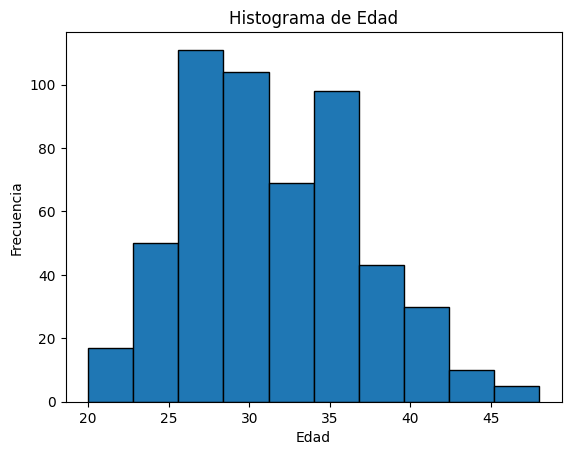

In [14]:
plt.hist(df_num[" Age (yrs)"], bins=10,edgecolor = "black")
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Histograma de Edad')

Aquí podemos observar cómo es que se distribuye la edad entre todos los registros, donde podemos observar que la gran mayoría de los registros se encuentran entre los 25 y los 31 años.

#### Peso

Text(0.5, 1.0, 'Boxplot Peso')

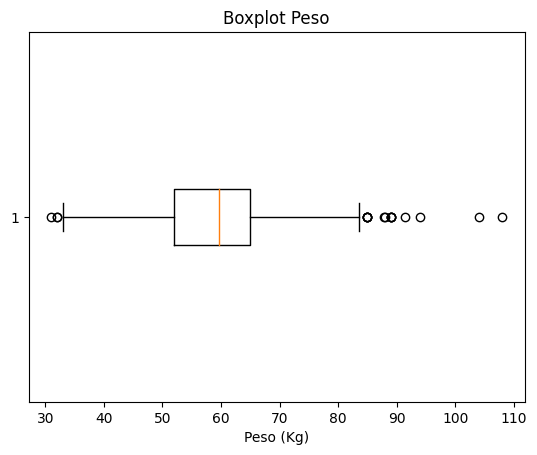

In [15]:
plt.boxplot(df_num["Weight (Kg)"], vert=False)

plt.xlabel('Peso (Kg)')
plt.title('Boxplot Peso')

Con este diagrama de cajas y bigotes se puede observar cómo se encuentra la distrubución del peso en los registros, dando un rango intercuartílico de 34 a 86 kilogramos aproximadamente, siendo la mediana aproximadamente 60 kilogramos, con ciertos valores extremos tanto inferiores como superiores.

#### Altura

Text(0.5, 1.0, 'Boxplot Altura')

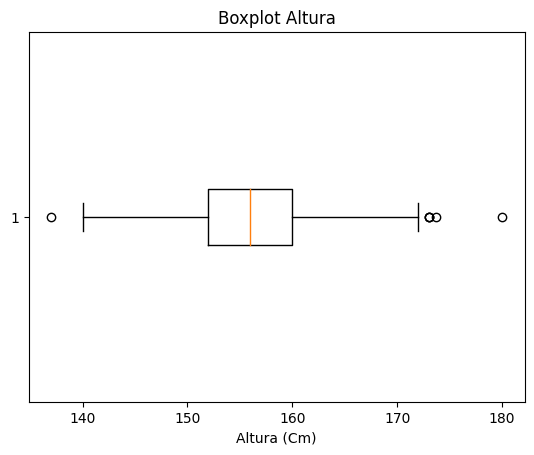

In [16]:
plt.boxplot(df_num["Height(Cm) "], vert=False)

plt.xlabel('Altura (Cm)')
plt.title('Boxplot Altura')

De este diagrama de cajas y bigotes se puede apreciar lo mismo que con el anterior, el rango intercuartílico de esta variable es de 1.4 metros hasta 1.72 metros aproximadamente, teniendo solamente cuatro valores atípicos, con una mediana de aproximadamente 1.56 metros.

#### Indice de Masa Corporal

Text(0.5, 1.0, 'Histograma de IMC')

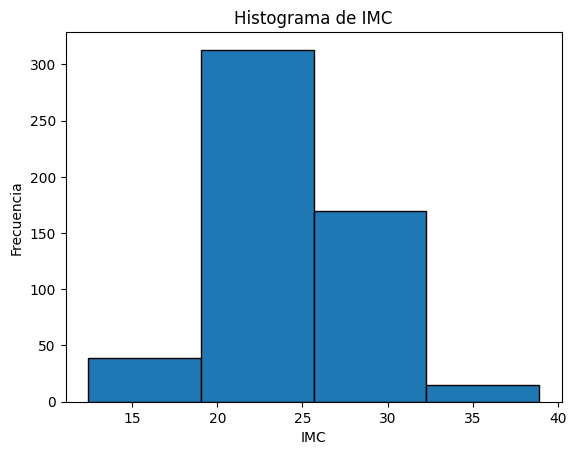

In [17]:
plt.hist(df_num["BMI"], bins=4, edgecolor = "black")
plt.xlabel('IMC')
plt.ylabel('Frecuencia')
plt.title('Histograma de IMC')

De este histograma se puede observar que el grupo con más registros con amplia diferencia es el del peso normal (18.5-24.9) seguido del grupo con sobrepeso (25.0-29.9)

#### Grupo sanguíneo

Text(0.5, 1.0, 'Tipos de sangre')

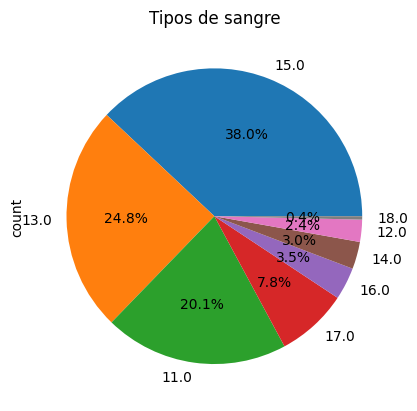

In [18]:
frecuencia_bg = df["Blood Group"].value_counts()
frecuencia_bg.plot(kind='pie', autopct='%1.1f%%')
plt.title('Tipos de sangre')

Aquí se puede observar que solamente entre dos tipos de sangre (15 y 13) se agrupa a más del 50% de los registros y si se juntan con la tercera opción (11) se tienen más del 75% de los registros totales, por lo que es sumamente común que una mujer tenga alguno de estos tres tipos de sangre.

#### Pulsos por minuto

Text(0.5, 1.0, 'Boxplot Pulsos')

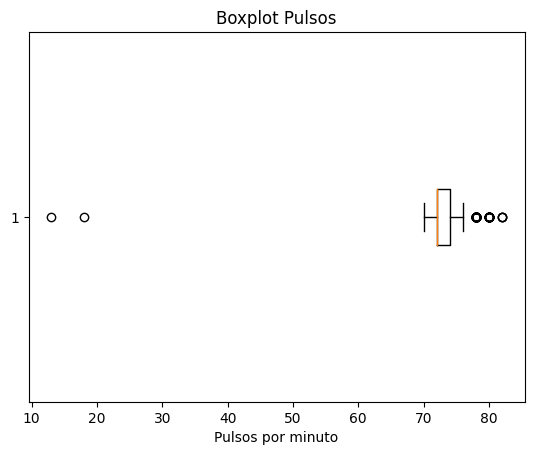

In [19]:
plt.boxplot(df_num["Pulse rate(bpm) "], vert=False)
plt.xlabel('Pulsos por minuto')
plt.title('Boxplot Pulsos')

Aquí se demuestra que el dataset contiene errores, pues existen dos registros (13 y 18) que son valores imposibles, por lo que se asumirá que estos valores deberían de ser 73 y 78 respectivamente y se hará la modificación manualmente.

Text(0.5, 1.0, 'Boxplot Pulsos por minuto')

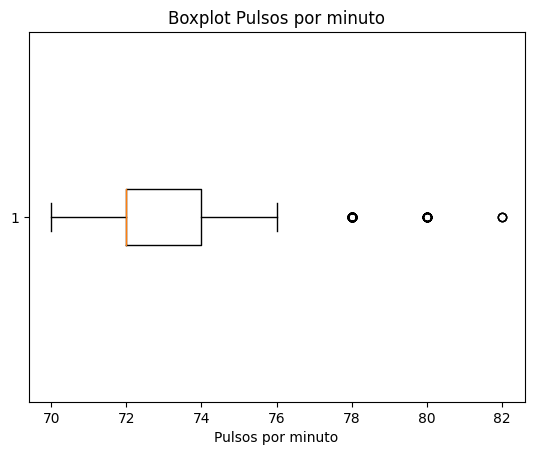

In [20]:
df_num['Pulse rate(bpm) '] = df_num['Pulse rate(bpm) '].replace(13, 73)
df_num['Pulse rate(bpm) '] = df_num['Pulse rate(bpm) '].replace(18, 78)

# También se corrige en el dataset original
df['Pulse rate(bpm) '] = df['Pulse rate(bpm) '].replace(13, 73)
df['Pulse rate(bpm) '] = df['Pulse rate(bpm) '].replace(18, 78)

# Se muestra el diagrama nuevamente
plt.boxplot(df_num["Pulse rate(bpm) "], vert=False)
plt.xlabel('Pulsos por minuto')
plt.title('Boxplot Pulsos por minuto')

En este boxplot nuevo se puede apreciar bien la información, se muestra que el rango intercuartílico es de 70 a 76 pulsos por minuto (ppm), la mediana se encuentra en 72 ppm y existen tres datos extremos superiores.

#### Respiraciones por minuto

Text(0.5, 1.0, 'Boxplot Respiraciones por minuto')

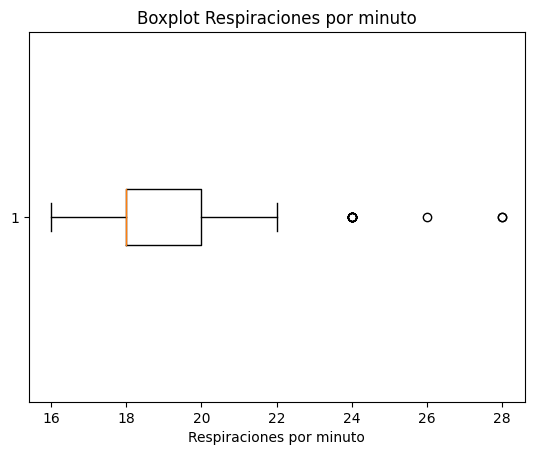

In [21]:
plt.boxplot(df_num["RR (breaths/min)"], vert=False)
plt.xlabel('Respiraciones por minuto')
plt.title('Boxplot Respiraciones por minuto')

Este diagrama es muy parecido al anterior, se muestra que el rango intercuartílico de respiraciones por minuto es de 16 a 22, mientras qye la mediana se ubica en 18 respiraciones por minuto, por último se tienen tres datos extremos superiores nuevamente.

#### Hemoglobina

Text(0.5, 1.0, 'Boxplot Niveles de Hemoglobina')

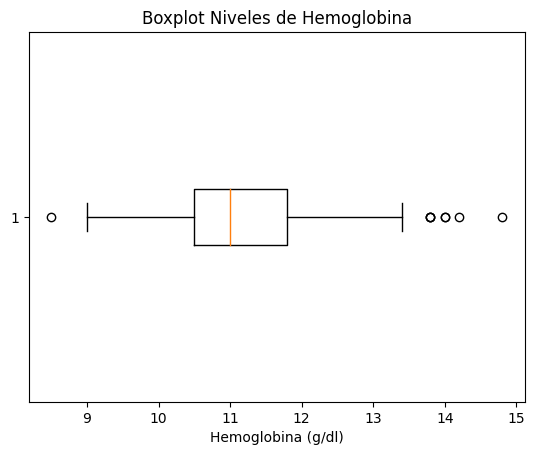

In [22]:
plt.boxplot(df_num["Hb(g/dl)"], vert=False)
plt.xlabel('Hemoglobina (g/dl)')
plt.title('Boxplot Niveles de Hemoglobina')

Al igual que en los dos gráficos anteriores se empleó un diagrama de cajas y bigotes para representar el nivel de hemoglobina, se tiene un rango intercuartílico de 9 a 13.4 g/dl con una mediana de 11 g/dl mientras que se tienen 5 datos atípicos, uno inferior y cuatro superiores.

#### Regularidad e irregularidad en el periodo

Text(0.5, 1.0, 'Conteo Irregularidad en Periodo')

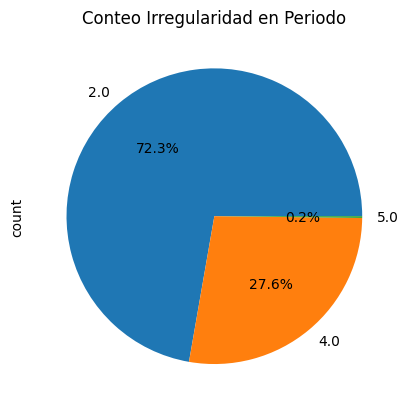

In [23]:
frecuencia_cri = df["Cycle(R/I)"].value_counts()
frecuencia_cri.plot(kind='pie', autopct='%1.1f%%')
plt.title('Conteo Irregularidad en Periodo')

En este caso, dentro del dataset no queda muy claro si el 2 hace referencia a regular o irregular y en la documentación no hay información al respecto, por lo que se asume que 2 es regular y 4 es irregular. Con esto en mente se puede observar que casi tres cuartas partes de los registros mantienen un periodo regular. También se muestra un valor 5, que no se explica su significado, pero al ser solamente un registro se opta por ignorarlo.

#### Duración del periodo

Text(0.5, 0, 'Duración del periodo (dias)')

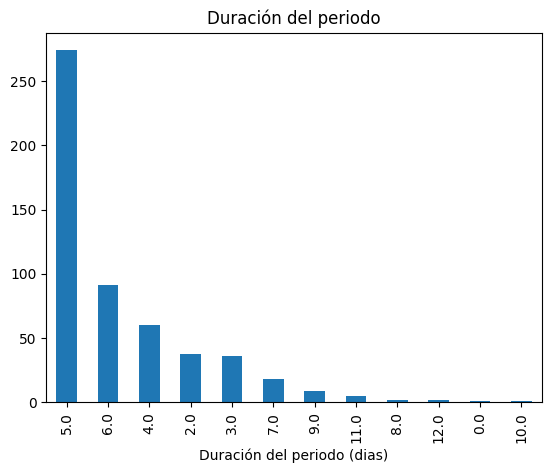

In [24]:
frecuencia_cl = df["Cycle length(days)"].value_counts()
frecuencia_cl.plot(kind="bar")
plt.title('Duración del periodo')
plt.xlabel("Duración del periodo (dias)")

En esta gráfica se puede observar que lo más normal es que el periodo dure un aproximado de 5 días, con los siguientes valores más comunes siendo un día más o un día menos, mientras que el máximo que duró un periodo fueron 12 días y el mínimo 0.

#### Años de matrimonio

Text(0.5, 1.0, 'Boxplot años de matrimonio')

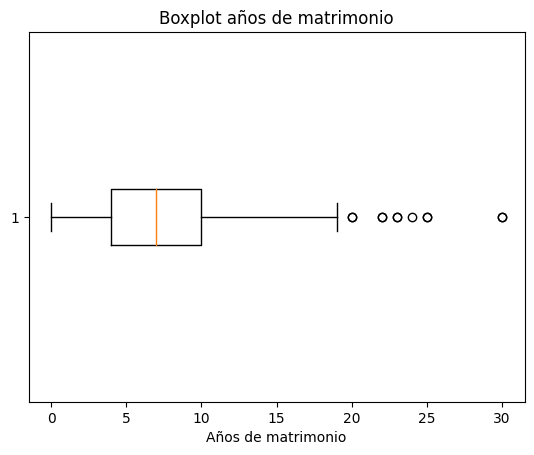

In [25]:
plt.boxplot(df_num["Marraige Status (Yrs)"], vert=False)
plt.xlabel('Años de matrimonio')
plt.title('Boxplot años de matrimonio')

En este gráfico de cajas y bigotes se muestra que el rango intercuartílico es de 0 a 20 años, con una mediana en aproximadamente 7 años. Se tienen un total de 5 datos extremos, siendo el mayor de estos más de 30 años.

#### Número de abortos

Text(0.5, 1.0, 'Conteo Número de abortos')

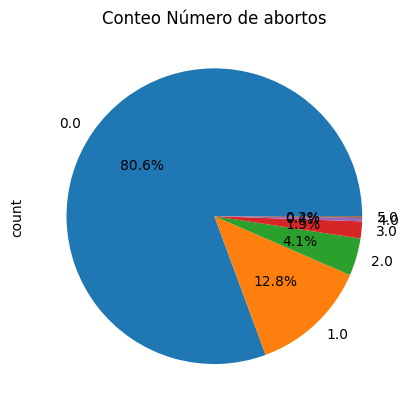

In [26]:
frecuencia_abo = df["No. of aborptions"].value_counts()
frecuencia_abo.plot(kind='pie', autopct='%1.1f%%')
plt.title('Conteo Número de abortos')

En esta gráfica de pastel se demuestra que más del 80% de mujeres no han tenido un aborto, mientras que el resto se distribuye desde 1 hasta 5 abortos, siendo cada vez menos comunes a medida que aumenta el número de abortos.

#### Niveles Beta-HCG
Se realizaron dos pruebas de los niveles Beta-HCG para apreciar posibles diferencias.

Text(0.5, 1.0, 'Nivel Beta-HCG Prueba 1')

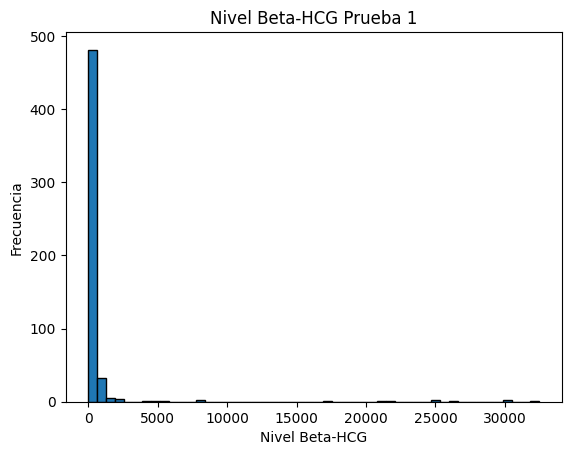

In [27]:
plt.hist(df_num["  I   beta-HCG(mIU/mL)"], bins = 50, edgecolor = "black")
plt.xlabel("Nivel Beta-HCG")
plt.ylabel('Frecuencia')
plt.title('Nivel Beta-HCG Prueba 1')

En el histograma se demuestra que es extremadamente común que en la primera prueba de nivel Beta se obtenga un resultado en un rango de apenas unos cientos mIU/mL; sin embargo, existen diversos registros que son un poco atípicos es incluso unos que llegan a un extremo muy elevado, llegando a más de 30,000 mIU/mL.

Text(0.5, 1.0, 'Nivel Beta-HCG Prueba 2')

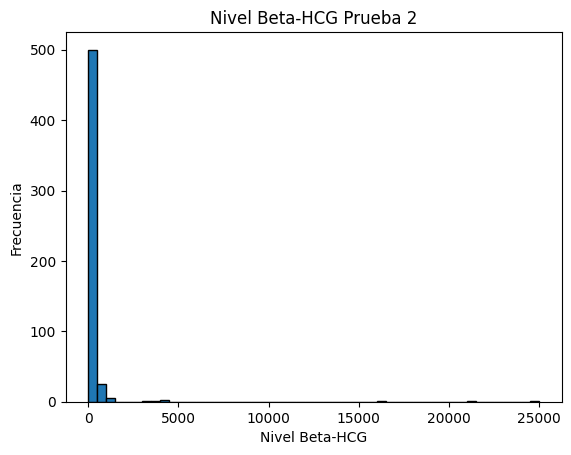

In [28]:
plt.hist(df_num["II    beta-HCG(mIU/mL)"], bins = 50, edgecolor = "black")
plt.xlabel("Nivel Beta-HCG")
plt.ylabel('Frecuencia')
plt.title('Nivel Beta-HCG Prueba 2')

En la segunda prueba se presenta un histograma muy parecido al anterior; sin embargo, el rango de este es 5000 uniades menor.

#### Follicle Stimulating Hormone

Text(0.5, 1.0, 'Follicle Stimulating Hormone')

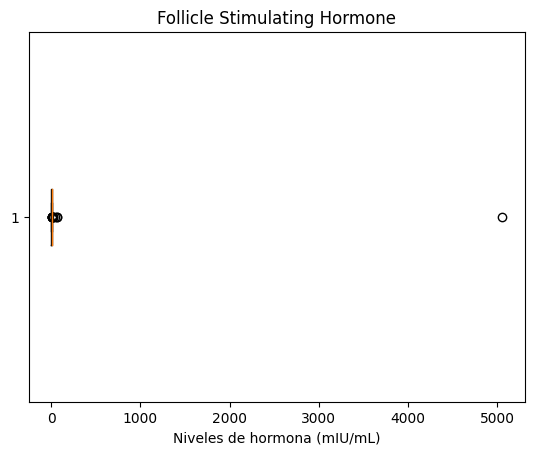

In [29]:
plt.boxplot(df_num["FSH(mIU/mL)"], vert=False)
plt.xlabel('Niveles de hormona (mIU/mL)')
plt.title('Follicle Stimulating Hormone')

De este gráfico no se puede obtener mucha información ya que un solo dato atípico no nos permite observar correctamente la distribución de los datos.

#### Lutenizing hormone

Text(0.5, 1.0, 'Lutenizing hormone')

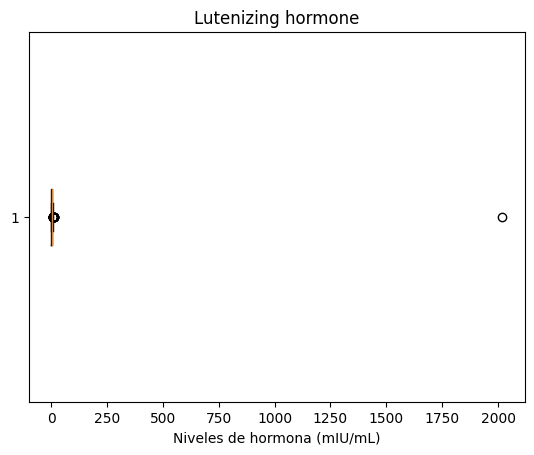

In [30]:
plt.boxplot(df_num["LH(mIU/mL)"], vert=False)
plt.xlabel('Niveles de hormona (mIU/mL)')
plt.title('Lutenizing hormone')

En este gráfico ocurre lo mismo que en el anterior, no se puede obtener información adecuada debido a un dato extremadamente atípico.

#### Transformación de datos

Estas últimas variables requieren de una transformación para poderlas apreciar correctamente, es por eso que se les aplica una transformación logarítmica que se encarga de hacer los datos atípicos más manejables.

In [31]:
#Creamos una función para transformar los datos
def log_transform(column):
    # Agregar una constante pequeña para manejar los ceros
    return column.apply(lambda x: np.log(x + 1))

df_transformada = df[["  I   beta-HCG(mIU/mL)","II    beta-HCG(mIU/mL)", "FSH(mIU/mL)", "LH(mIU/mL)"]]

# Aplica la transformacion a cada columna
df_transformada = df_transformada.apply(log_transform)

#df_transformada

Repetimos los últimos 4 plots:

Text(0.5, 1.0, 'Nivel Beta-HCG Prueba 1')

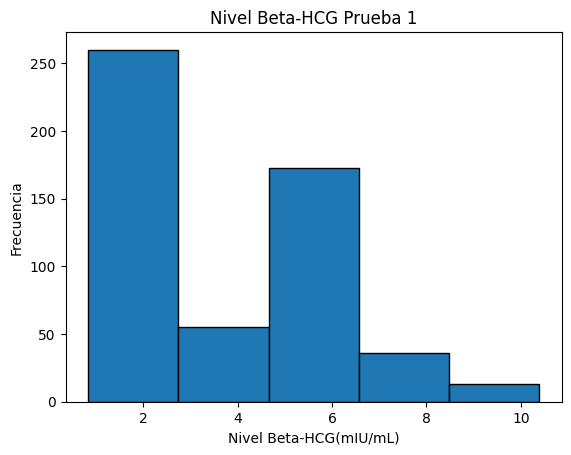

In [32]:
plt.hist(df_transformada["  I   beta-HCG(mIU/mL)"], bins = 5, edgecolor = "black")
plt.xlabel("Nivel Beta-HCG(mIU/mL)")
plt.ylabel('Frecuencia')
plt.title('Nivel Beta-HCG Prueba 1')

Ya podemos observar que la primera prueba de nivel Beta tiende a tener valores menores a los 3 mIU/mL y entre 5 y 6.5 mIU/mL (después de la transformación).

Text(0.5, 1.0, 'Nivel Beta-HCG Prueba 2')

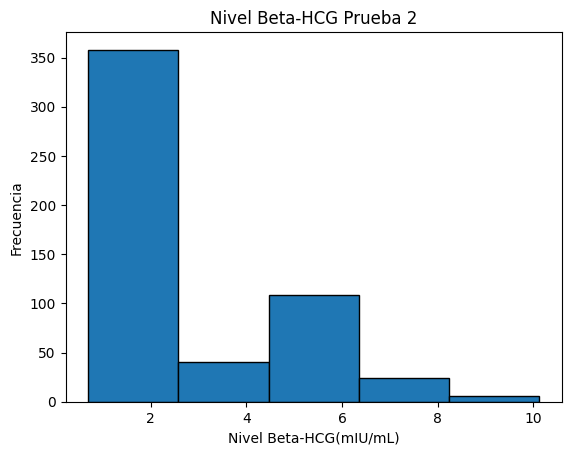

In [33]:
plt.hist(df_transformada["II    beta-HCG(mIU/mL)"], bins = 5, edgecolor = "black")
plt.xlabel("Nivel Beta-HCG(mIU/mL)")
plt.ylabel('Frecuencia')
plt.title('Nivel Beta-HCG Prueba 2')

Para la segunda prueba de nivel Beta podemos observar que los niveles tienden a bajar, pues ahora tenemos muchas más personas con un nivel Beta menor a los 3 mIU/mL. (Después de la transformación logarítmica)

Text(0.5, 1.0, 'Follicle Stimulating Hormone')

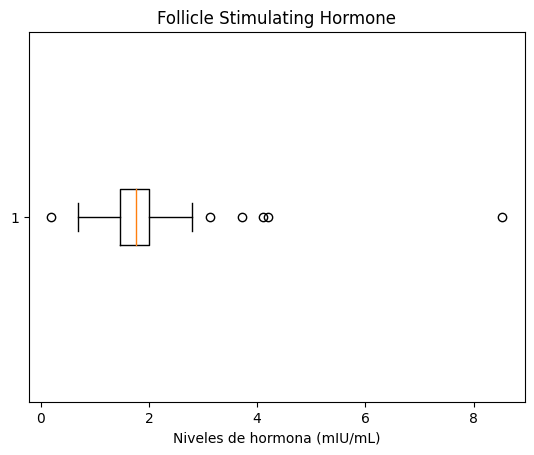

In [34]:
plt.boxplot(df_transformada["FSH(mIU/mL)"], vert=False)
plt.xlabel('Niveles de hormona (mIU/mL)')
plt.title('Follicle Stimulating Hormone')

Después de la transformación logarítmica podemos observar que el dato sigue siendo anormalmente atípico, pero ya se pueden analizar los datos, tenemos un rango intercuartílico que va desde aproximadamente 1 hasata 3 con una mediana que llega casi a 2 mIU/mL. Teniendo un dato atípico inferior y 5 datos atípicos superiores.

Text(0.5, 1.0, 'Lutenizing hormone')

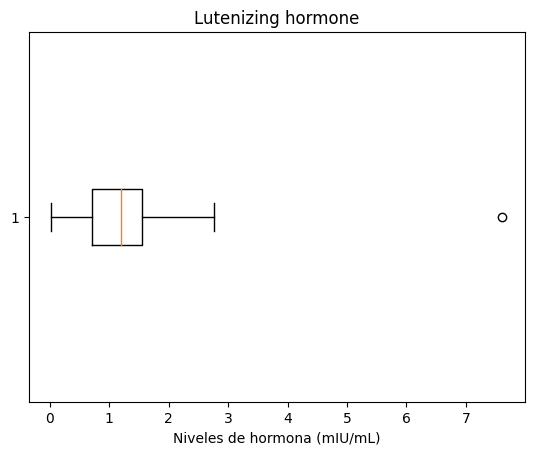

In [35]:
plt.boxplot(df_transformada["LH(mIU/mL)"], vert=False)
plt.xlabel('Niveles de hormona (mIU/mL)')
plt.title('Lutenizing hormone')

Después de la transformación logarítmica podemos observar que solamente existe un dato atípico para estos niveles de hormonas. El rango intercuartílico se encuentra desde casi 0 hasta 3 mIU/mL, con la mediana en aproximadamente 1.4 mIU/mL.

### Variables categóricas

In [36]:
df_bool

,PCOS (Y/N),Pregnant(Y/N),Weight gain(Y/N),hair growth(Y/N),Skin darkening (Y/N),Hair loss(Y/N),Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N)
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
536,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
538,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
539,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


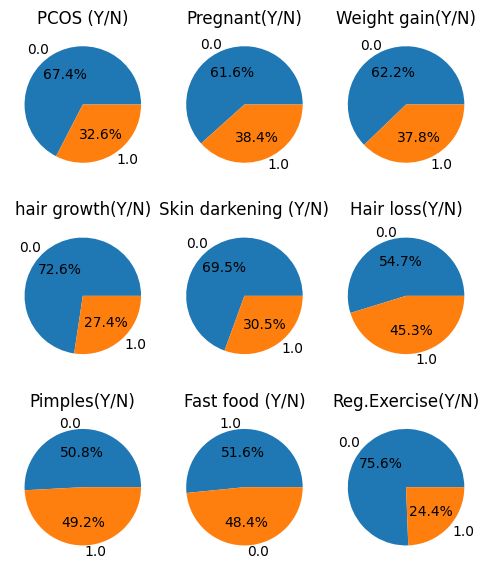

In [151]:
# Calcular porcentajes para cada variable
porcentajes = (df_bool.mean() * 100).round(2)

# Crear un subplot de tamaño adecuado

num_plots = len(df_bool.columns)
num_cols = 3
num_rows = (num_plots - 1) // num_cols + 1

fig, axes = plt.subplots(num_rows, num_cols, figsize=(5, 2*num_rows))

# Iterar sobre cada columna y dibujar los diagramas de pastel
for i, (col, ax) in enumerate(zip(df_bool.columns, axes.flatten())):
    counts = df[col].value_counts(normalize=True)
    ax.pie(counts, labels=counts.index, autopct='%1.1f%%')
    ax.set_title(f'{col}')

plt.tight_layout()
plt.show()

Las variables cualitativas se pueden expresar adecuadamente por medio de diagramas de pie, de esta manera podemos observar la distribución de las respuestas de las diferentes mujeres. Inmediatamente sale a la vista el dato de que 32.6% de las mujeres en este dataset fueron clasificadas como portadoras del síndrome, cuando en la parte de investigación se considera que solamente del 8% al 13% de las mujeres en edad reproductiva son diagnosticadas con el síndrome. Esto puede deberse a que muchas de las mujeres se sometieron a la revisión al suponer que algo no estaba bien con ellas y al final resultó que sus suposiciones eran ciertas.

## Modelos de aprendizaje supervisado

### Visto en clase

El método que vamos a aplicar visto en clase es el de las redes neuronales, esto debido a que la cantidad de columnas presentes en nuestro dataset son más de 40. Originalmente íbamos a aplicar árboles de decisión, pero al ser tantas columnas la magnitud de estos árboles crece exponencialmente. Las redes neuronales se desempeñan adecuadamente cuando se considera que se tienen muchas variables que pueden afectar a la variable a predecir.

In [38]:
import random
import seaborn as sns
from sklearn.model_selection import train_test_split
pd.options.display.float_format = '{:.2f}'.format

In [39]:
#Separamos la clase a predecir en y y dejamos el dataset en X para más facilidad de programar
y = df["PCOS (Y/N)"]
#y
X = df

In [40]:
# Se hace la división de train y test con una semilla fija para que sea reproducible
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.2,  random_state = 42)

#### GridSearch

Con ayuda de la función GridSearchCV de sklearn aplicamos cross validation para encontrar la combinación del modelo que mejor rendimiento tiene. Nota: Es necesario ajustar el número de hidden layers y max iter dependiendo de los resultados anteriores. El mejor modelo que encontramos fue el siguiente después de varias búsquedas:

In [158]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score, make_scorer, accuracy_score, confusion_matrix, classification_report, recall_score, roc_curve
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

In [136]:
# Hidden_layer_sizes eliminados:
# (10,10),(50,50),(100,50),(100,100),(300,300)

# Max_iter eliminados:
# 2, 5, 20, 50, 100

parameters = {'hidden_layer_sizes':[(20,20),(20,25),(25,25),(20,50),(50,25)], 'max_iter' : [500,1000,2500]}
nn = MLPClassifier()
clf_nn = GridSearchCV(nn, parameters,verbose = 3,cv = 5 , scoring="accuracy")
clf_nn.fit(X_train, y_train)
resultados_modelo1 = pd.DataFrame(clf_nn.cv_results_)
resultados_modelo1.sort_values("rank_test_score")

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV 1/5] END hidden_layer_sizes=(20, 20), max_iter=500;, score=0.767 total time=   0.2s
[CV 2/5] END hidden_layer_sizes=(20, 20), max_iter=500;, score=0.814 total time=   0.7s
[CV 3/5] END hidden_layer_sizes=(20, 20), max_iter=500;, score=0.779 total time=   0.1s
[CV 4/5] END hidden_layer_sizes=(20, 20), max_iter=500;, score=0.733 total time=   0.2s
[CV 5/5] END hidden_layer_sizes=(20, 20), max_iter=500;, score=0.682 total time=   0.2s
[CV 1/5] END hidden_layer_sizes=(20, 20), max_iter=1000;, score=0.744 total time=   0.2s
[CV 2/5] END hidden_layer_sizes=(20, 20), max_iter=1000;, score=0.860 total time=   1.0s
[CV 3/5] END hidden_layer_sizes=(20, 20), max_iter=1000;, score=0.837 total time=   0.1s
[CV 4/5] END hidden_layer_sizes=(20, 20), max_iter=1000;, score=0.686 total time=   0.1s
[CV 5/5] END hidden_layer_sizes=(20, 20), max_iter=1000;, score=0.788 total time=   0.1s
[CV 1/5] END hidden_layer_sizes=(20, 20), max_iter=250

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_hidden_layer_sizes,param_max_iter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
14,0.74,0.78,0.00,0.00,"(50, 25)",2500,"{'hidden_layer_sizes': (50, 25), 'max_iter': 2...",0.80,0.85,0.86,0.77,0.76,0.81,0.04,1
5,0.25,0.19,0.00,0.00,"(20, 25)",2500,"{'hidden_layer_sizes': (20, 25), 'max_iter': 2...",0.79,0.83,0.87,0.71,0.76,0.79,0.06,2
1,0.31,0.35,0.00,0.00,"(20, 20)",1000,"{'hidden_layer_sizes': (20, 20), 'max_iter': 1...",0.74,0.86,0.84,0.69,0.79,0.78,0.06,3
12,0.42,0.43,0.00,0.00,"(50, 25)",500,"{'hidden_layer_sizes': (50, 25), 'max_iter': 500}",0.72,0.81,0.84,0.78,0.75,0.78,0.04,4
7,0.33,0.36,0.00,0.00,"(25, 25)",1000,"{'hidden_layer_sizes': (25, 25), 'max_iter': 1...",0.76,0.83,0.85,0.67,0.74,0.77,0.06,5
13,0.59,0.77,0.00,0.00,"(50, 25)",1000,"{'hidden_layer_sizes': (50, 25), 'max_iter': 1...",0.71,0.83,0.77,0.79,0.74,0.77,0.04,6
0,0.25,0.20,0.00,0.00,"(20, 20)",500,"{'hidden_layer_sizes': (20, 20), 'max_iter': 500}",0.77,0.81,0.78,0.73,0.68,0.76,0.04,7
8,0.30,0.25,0.00,0.00,"(25, 25)",2500,"{'hidden_layer_sizes': (25, 25), 'max_iter': 2...",0.74,0.77,0.78,0.67,0.74,0.74,0.04,8
4,0.25,0.26,0.00,0.00,"(20, 25)",1000,"{'hidden_layer_sizes': (20, 25), 'max_iter': 1...",0.73,0.83,0.71,0.64,0.79,0.74,0.06,9
2,0.23,0.16,0.00,0.00,"(20, 20)",2500,"{'hidden_layer_sizes': (20, 20), 'max_iter': 2...",0.78,0.81,0.58,0.76,0.76,0.74,0.08,10


In [137]:
# Guardamos el mejor modelo de acuerdo con el GridSearch
clf_nn_best = clf_nn.best_estimator_

#### Rendimiento del modelo

In [203]:
import seaborn as sns


y_true = np.array(y_test)
y_pred = clf_nn_best.predict(X_test)

In [204]:
clr = classification_report(y_true, y_pred)
print(clr)

              precision    recall  f1-score   support

         0.0       0.91      0.42      0.57        74
         1.0       0.42      0.91      0.57        34

    accuracy                           0.57       108
   macro avg       0.67      0.67      0.57       108
weighted avg       0.76      0.57      0.57       108



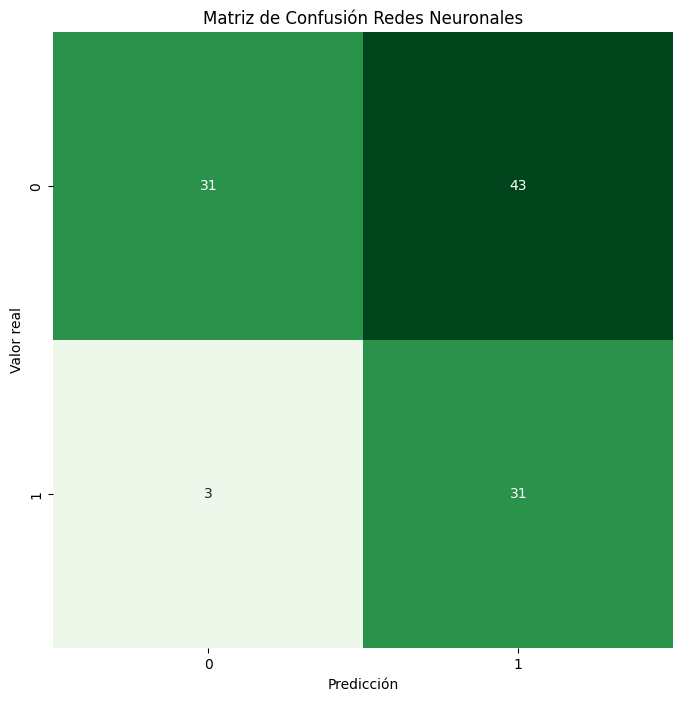

In [205]:
cm = confusion_matrix(y_true, y_pred)


plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Greens', cbar=False)
plt.xticks(np.arange(2) + 0.5)
plt.yticks(np.arange(2) + 0.5)
plt.xlabel("Predicción")
plt.ylabel("Valor real")
plt.title("Matriz de Confusión Redes Neuronales")
plt.show()

En cuanto al rendimiento del modelo podemos observar que el realizar la validación cruzada nos ayudó a estimar el mejor modelo, quizá existiera algún modelo con mejor accuracy que el seleccionado, pero lo que hace GridSearch es buscar aquel modelo que en general tuvo mejor desempeño, no solo con una sección especíifica de los datos. Esto elimina el factor de que exista un modelo que realice bien su tarea meramente por suerte.

Al revisar la matriz de confusión podemos notar que a la hora de predecir cuando una persona está enferema y verdaderamente lo está es bastante eficiente (teniendo un excelente 91% en recall); sin embargo, a la hora de predecir si una persona no está enferma tiene áreas de oportunidad ya que el recall de esa variable es bastante pobre (42%). No obstante, consideramos que en cuestiones de salud es mucho más importante predecir adecuadamente si una persona posea una enfermedad (es decir, tener una buena precisión en los verdaderos positivos). Ahora bien, los falsos negativos también son importantes y predecirlos érroneamente puede tener sus consecuencias, pero siempre se le puede invitar al paciente a realizarse una prueba formal en cualquier otro hospital para asegurarnos de que esté libre de la enfermedad.

También se realizó una curva ROC para observar el rendimiento del modelo.

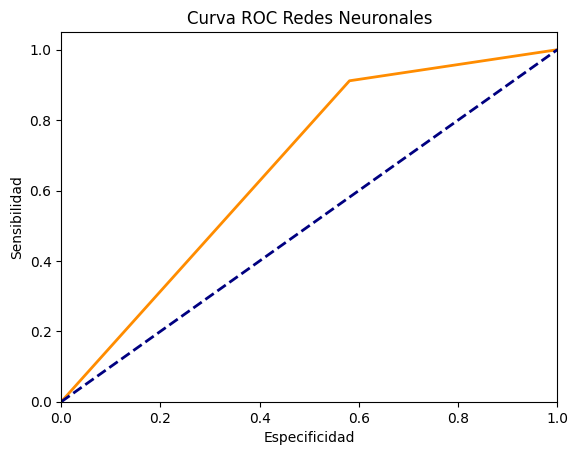

In [206]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)


plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2,)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Especificidad')
plt.ylabel('Sensibilidad')
plt.title('Curva ROC Redes Neuronales')
plt.show()

### Ajeno a la clase

Para el método ajeno a la clase, consideramos que lo más óptimo es realizar el método de random forest. Consideramos que es probable que este método arroje peores resultados que las redes neuronales, debido a que siguen siendo árboles de decisión, pero tenemos la esperanza de que al ser muchos árboles aleatorios al juntarse se consiga un resultado por lo menos aceptable.

#### Modelo

In [207]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [208]:
#Separamos la clase a predecir en y y dejamos el dataset en X para más facilidad de programar
y = df["PCOS (Y/N)"]
#y
X = df.drop(["PCOS (Y/N)"], axis = 1)
#X

In [209]:
# Se elige la misma semilla que en el modelo anterior para asegurar una comparación justa
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [210]:
# Creamos el modelo
clf = RandomForestClassifier(n_estimators=100, random_state=42)
# Entrenar el modelo
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [211]:
y_pred = clf.predict(X_test)
y_true = np.array(y_test)

#### Rendimiento del modelo

In [212]:
clr = classification_report(y_true, y_pred)
print(clr)

              precision    recall  f1-score   support

         0.0       0.89      0.95      0.92        74
         1.0       0.86      0.74      0.79        34

    accuracy                           0.88       108
   macro avg       0.87      0.84      0.85       108
weighted avg       0.88      0.88      0.88       108



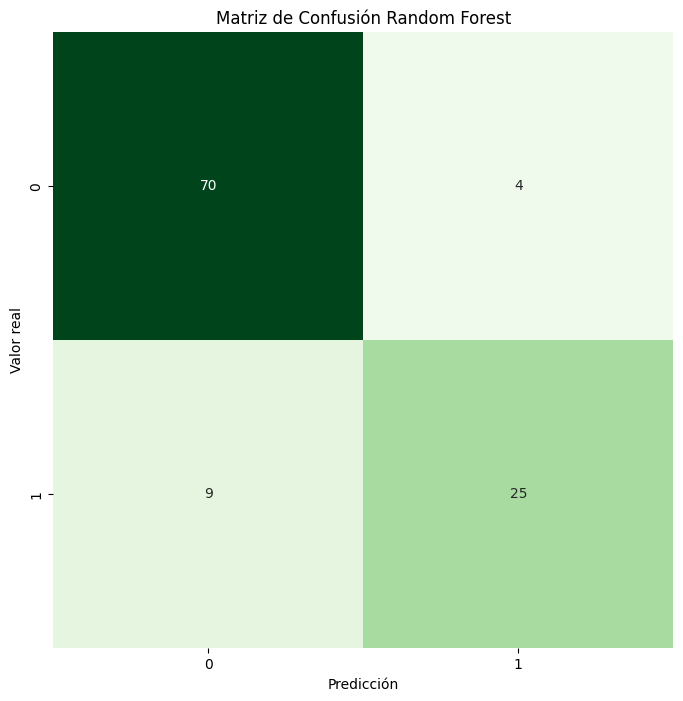

In [213]:
cm = confusion_matrix(y_true, y_pred)


plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Greens', cbar=False)
plt.xticks(np.arange(2) + 0.5)
plt.yticks(np.arange(2) + 0.5)
plt.xlabel("Predicción")
plt.ylabel("Valor real")
plt.title("Matriz de Confusión Random Forest")
plt.show()

De igual manera que en modelo de redes neuronales, se deicidió emplear una curva ROC para random forest para medir su desempeño.

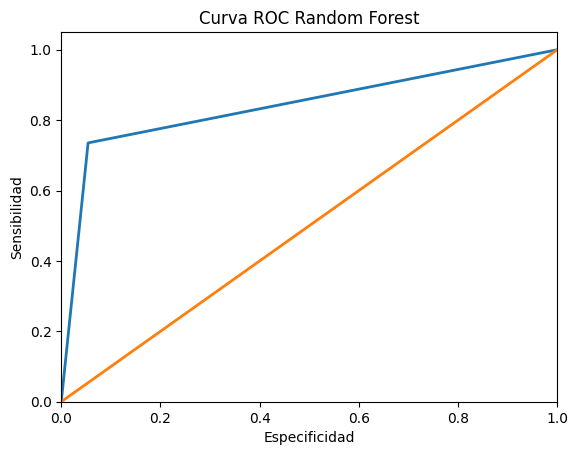

In [214]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)


plt.figure()
plt.plot(fpr, tpr, lw=2)
plt.plot([0, 1], [0, 1], lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Especificidad')
plt.ylabel('Sensibilidad')
plt.title('Curva ROC Random Forest')
plt.show()

Ya tenemos los resultados de ambos modelos y se pueden observar diversas diferencias entre ellos. Comenzando con el recall de random forest, tuve un excelente desempeño para predecir correctamente cuando los pacientes no poseen la enfermedad (un 95% de efectividad). Mientras que para predecir si una persona padece la enfermedad tiene un recall apenas satisfactorio (casi 3 de 4 pacientes), por lo que este modelo resulta especialmente útil para predecir si una persona se encuentra libre de la enfermedad, mientras que para decidir si la padece es mucho más recomendable emplear el modelo de redes neuronales.